# **Predicting Parkinson's disease using Machine Learning**
This project is aimed to predict if an adult has the Parkinson Disease (PD) or not.

Parkinson’s Disease (PD) is a degenerative neurological disorder that irremediably decreases mental faculties and movement.

Detecting Parkinson's disease is not easy because several factors come into play to conclude on the presence of the disease. Having one or more symptoms does not necessarily mean being affected by the disease.

Moreover, detecting the disease as early as possible is key as :  

*   🎯 It allows the medical profession to better anticipate future treatments
and dosages.
*   🎯 It also allows for the preparation of necessary adjustments for patients in their daily lives.
*   🎯 And finally, it allows for better anticipation of the moment when placement in a specialized facility becomes necessary. On a larger scale, for government structures, it is therefore a powerful tool for anticipating the construction and implementation of specialized facilities.

Based on 35 different features mainly regarding some clinical measurements, medical history and cognitive assessments, we'll look for the best model that will be able to predict the presence of Parkinsons diseases.


The dataset can be found and downloaded on kaggle.com :
[🏥Parkinson's Disease Dataset Analysis🧠](https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis)

This notebook is structured as a classic ML project, including :
1. Data Loading

2. [Exploratory Data Analysis](https://colab.research.google.com/drive/1Vx8oge9UybwiFPlcB80QtSOpSE7zDECd#scrollTo=NaeBhM1gHxUb&line=1&uniqifier=1)

3. Train/Test split

4. Feature Engineering

5. Modeling and selecting best model

6. Hyperparameter tuning

7. Results and Conclusion


---




# 1. Data Loading

Let's first load the data and display the 5 first rows.
Data is my personal drive. The path of the dataset can be edited in the line
*df = pd.read_csv ('')*

In [2]:
import pandas as pd

# Load a CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the actual path to your file
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/parkinsons_disease_data.csv', sep=',', engine='python')
    print("File loaded successfully!")
    # Display the first 5 rows of the DataFrame
    display(df.head())
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


Data is loaded. Let's move to the data exploration.

######## As described in the introduction, and before analyzing in more detail every column, we can see the 14 features in the 11 first columns and the intensity of the disease progression in the last column ('*Disease_Progression*')


---



# 2. Exploratory Data Analysis

**▶ a. Let's count the number of samples :**

In [3]:
# Get the number of rows and columns
num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 2105
Number of columns: 35


The dataset is composed of 2,105 samples, which is a more than enough for carrying out serious and convincing analyses.

The 35 columns are the input and output data. One of the column is the output data.


**▶ b. Let's check the data type and if there are any missing values :**

In [4]:
# Create a DataFrame with column names, data types, and non-null counts
data_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.notnull().sum()
})

# Display the new DataFrame
display(data_info)

,Column Name,Data Type,Non-Null Count
PatientID,PatientID,int64,2105
Age,Age,int64,2105
Gender,Gender,int64,2105
Ethnicity,Ethnicity,int64,2105
EducationLevel,EducationLevel,int64,2105
BMI,BMI,float64,2105
Smoking,Smoking,int64,2105
AlcoholConsumption,AlcoholConsumption,float64,2105
PhysicalActivity,PhysicalActivity,float64,2105
DietQuality,DietQuality,float64,2105


There are no missing values. All 2,105 samples have values for inputs and output


**▶ d. Let's give a more precise and textual description of the different columns**

Here is a description of each column in the dataset:

*   **PatientID**: A unique identifier for each patient.

**Demographic details**
*   **Age**: The age of the patient in years.
*   **Gender**: The gender of the patient (0 for Female, 1 for Male).
*   **Ethnicity**: The ethnicity of the patient (represented by numerical codes: 0, 1, 2, 3).
*   **EducationLevel**: The education level of the patient (represented by numerical codes: 0, 1, 2, 3).

**Lifestyle factors**
*   **BMI**: Body Mass Index of the patient.
*   **Smoking**: Smoking status of the patient (0 for No, 1 for Yes).
*   **AlcoholConsumption**: Level of alcohol consumption.
*   **PhysicalActivity**: Level of physical activity.
*   **DietQuality**: Quality of the patient's diet.
*   **SleepQuality**: Quality of the patient's sleep.

**Medical History**
*   **FamilyHistoryParkinsons**: Indicates if there is a family history of Parkinson's disease (0 for No, 1 for Yes).
*   **TraumaticBrainInjury**: Indicates if the patient has a history of traumatic brain injury (0 for No, 1 for Yes).
*   **Hypertension**: Indicates if the patient has hypertension (0 for No, 1 for Yes).
*   **Diabetes**: Indicates if the patient has diabetes (0 for No, 1 for Yes).
*   **Depression**: Indicates if the patient has depression (0 for No, 1 for Yes).
*   **Stroke**: Indicates if the patient has a history of stroke (0 for No, 1 for Yes).

**Clinical Measurements**
*   **SystolicBP**: Systolic blood pressure.
*   **DiastolicBP**: Diastolic blood pressure.
*   **CholesterolTotal**: Total cholesterol level.
*   **CholesterolLDL**: LDL cholesterol level.
*   **CholesterolHDL**: HDL cholesterol level.
*   **CholesterolTriglycerides**: Triglycerides level.

**Functional Assessments**
*   **UPDRS**: Unified Parkinson's Disease Rating Scale score.
*   **MoCA**: Montreal Cognitive Assessment score.
*   **FunctionalAssessment**: Score from a functional assessment.

**Symptoms**
*   **Tremor**: Indicates the presence of tremor (0 for No, 1 for Yes).
*   **Rigidity**: Indicates the presence of rigidity (0 for No, 1 for Yes).
*   **Bradykinesia**: Indicates the presence of bradykinesia (0 for No, 1 for Yes).
*   **PosturalInstability**: Indicates the presence of postural instability (0 for No, 1 for Yes).
*   **SpeechProblems**: Indicates the presence of speech problems (0 for No, 1 for Yes).
*   **SleepDisorders**: Indicates the presence of sleep disorders (0 for No, 1 for Yes).
*   **Constipation**: Indicates the presence of constipation (0 for No, 1 for Yes).

**Diagnosis Information**
*   **Diagnosis**: The target variable, indicating the diagnosis of Parkinson's disease (0 for No, 1 for Yes).

**Private information**
*   **DoctorInCharge**: Identifier for the doctor in charge (anonymized).

➡ **Diagnosis is the target variable.**

 This columns will have to be dropped from the input data.   

➡ **Some data, even if they appear to be anonymized, have no reason (and there are not necessary) to remain in our study** : *PatientID*, *DoctorInCharge*

These data will need to be removed from our dataset.

➡ **The presence of ethnicity data raises ethical questions about the retention of this data. The conclusions of this study concern the detection of a disease with the objective of anticipating possible treatment as much as possible. Regarding this study, I recommend retaining this data.**

➡ **Some data is binary or categorical** : *Gender*, *Ethnicity*, *EducationLevel*, *Smoking*, *All Medical History characteristics*, *All Symptoms characteristics*

All these columns will need to be hot-encoded

**▶ e. Let's check the basic statistics of the numerical columns :**

In [5]:
# Display basic statistics for numerical columns including variance
# Select only float64 columns
float_cols = df.select_dtypes(include=['float64']).columns

# Calculate basic statistics
basic_stats = df[float_cols].describe()

# Calculate variance separately
variance = df[float_cols].var().to_frame(name='variance').T

# Combine basic statistics and variance
all_stats = pd.concat([basic_stats, variance])

display(all_stats)

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,27.209493,10.040413,5.016674,4.912901,6.996639,226.860840,126.147858,59.670352,222.940500,101.415318,15.094314,4.989694
std,7.208099,5.687014,2.890919,2.872115,1.753065,43.589406,43.407036,23.370920,101.895822,56.591448,8.643014,2.933877
min,15.008333,0.002228,0.004157,0.000011,4.000497,150.062698,50.022828,20.027981,50.113604,0.028441,0.021191,0.001505
25%,20.782176,5.150278,2.455703,2.478503,5.488864,189.385178,88.841960,39.538643,132.520174,53.048148,7.517160,2.415890
50%,27.184571,10.070337,5.031550,4.825187,6.929819,228.528256,126.884570,59.343357,222.802452,102.561023,14.963574,4.983227
75%,33.462452,14.829565,7.512795,7.381487,8.558719,264.608100,163.912782,79.366628,311.699109,149.831682,22.608362,7.484220
max,39.999887,19.988866,9.995255,9.995864,9.999821,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697
variance,51.956690,32.342129,8.357413,8.249044,3.073237,1900.036357,1884.170773,546.199896,10382.758478,3202.592010,74.701689,8.607632


All numerical values are in the expected range of each data.

**g. Let's visualize the distribution of numerical columns using histograms :**

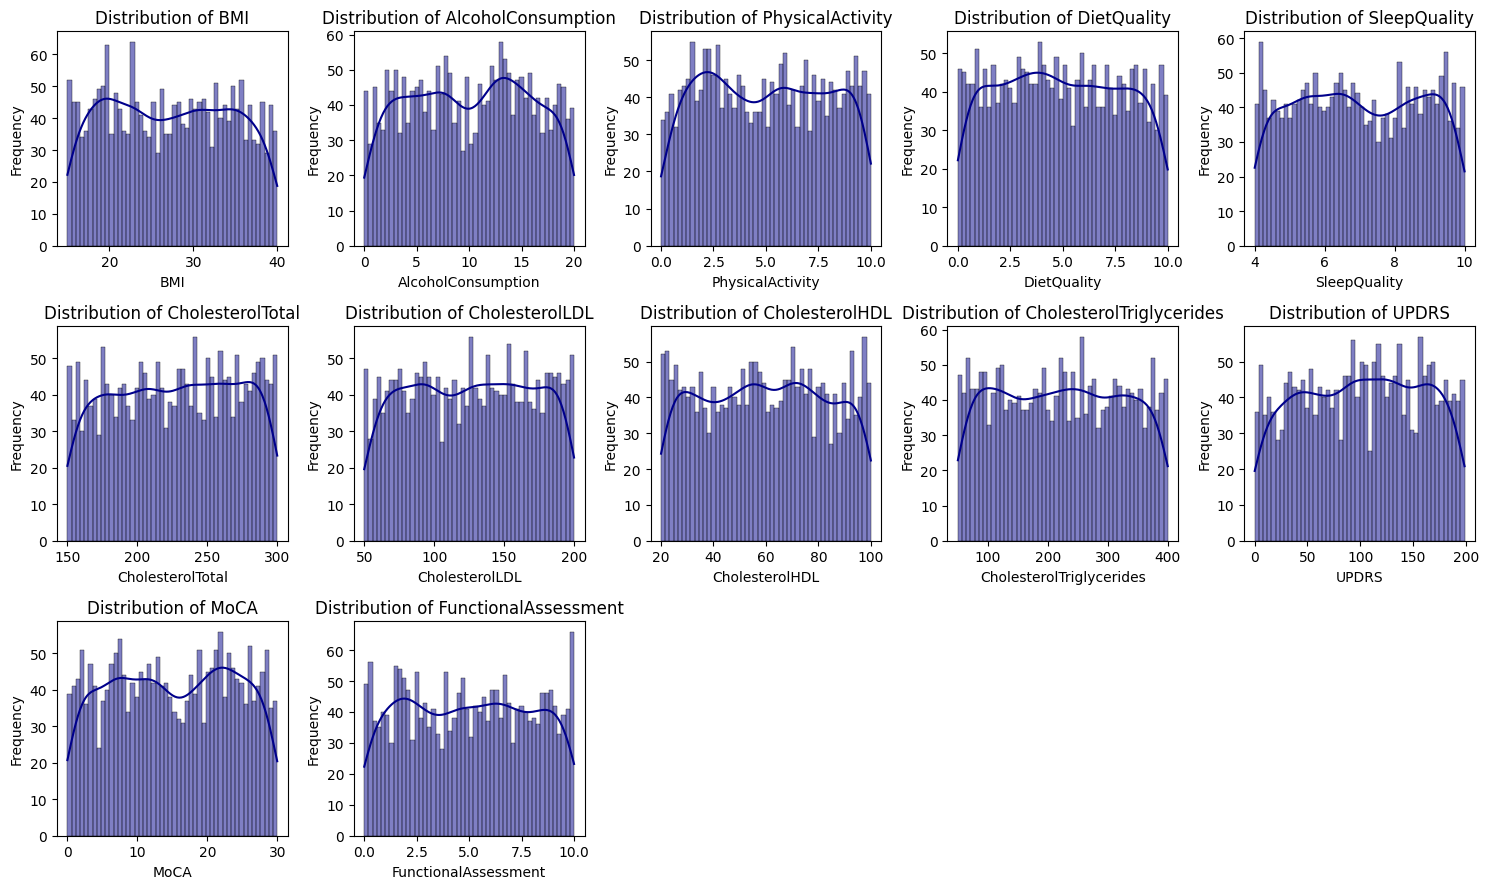

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only float64 columns for plotting, excluding binary ones
float_cols = df.select_dtypes(include=['float64']).columns

# Identify binary columns among float columns (although less common for floats, it's good practice)
binary_float_cols = [col for col in float_cols if df[col].nunique() == 2 and set(df[col].unique()) == {0.0, 1.0}]

# Exclude binary float columns from the list of float columns to plot
numerical_cols_for_plot = [col for col in float_cols if col not in binary_float_cols]

# Determine the number of rows and columns for the subplot grid
n_cols = 5 # Set number of columns to 5
n_rows = (len(numerical_cols_for_plot) + n_cols - 1) // n_cols

# Create subplots with a square figure size for each plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3)) # Adjusted figure size for more columns
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# Plot histograms for each selected numerical column with more bins
for i, col in enumerate(numerical_cols_for_plot):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=50, color='darkblue') # Increased number of bins and added color
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There doesn't seem to be an outlier. Let's check with box plots.

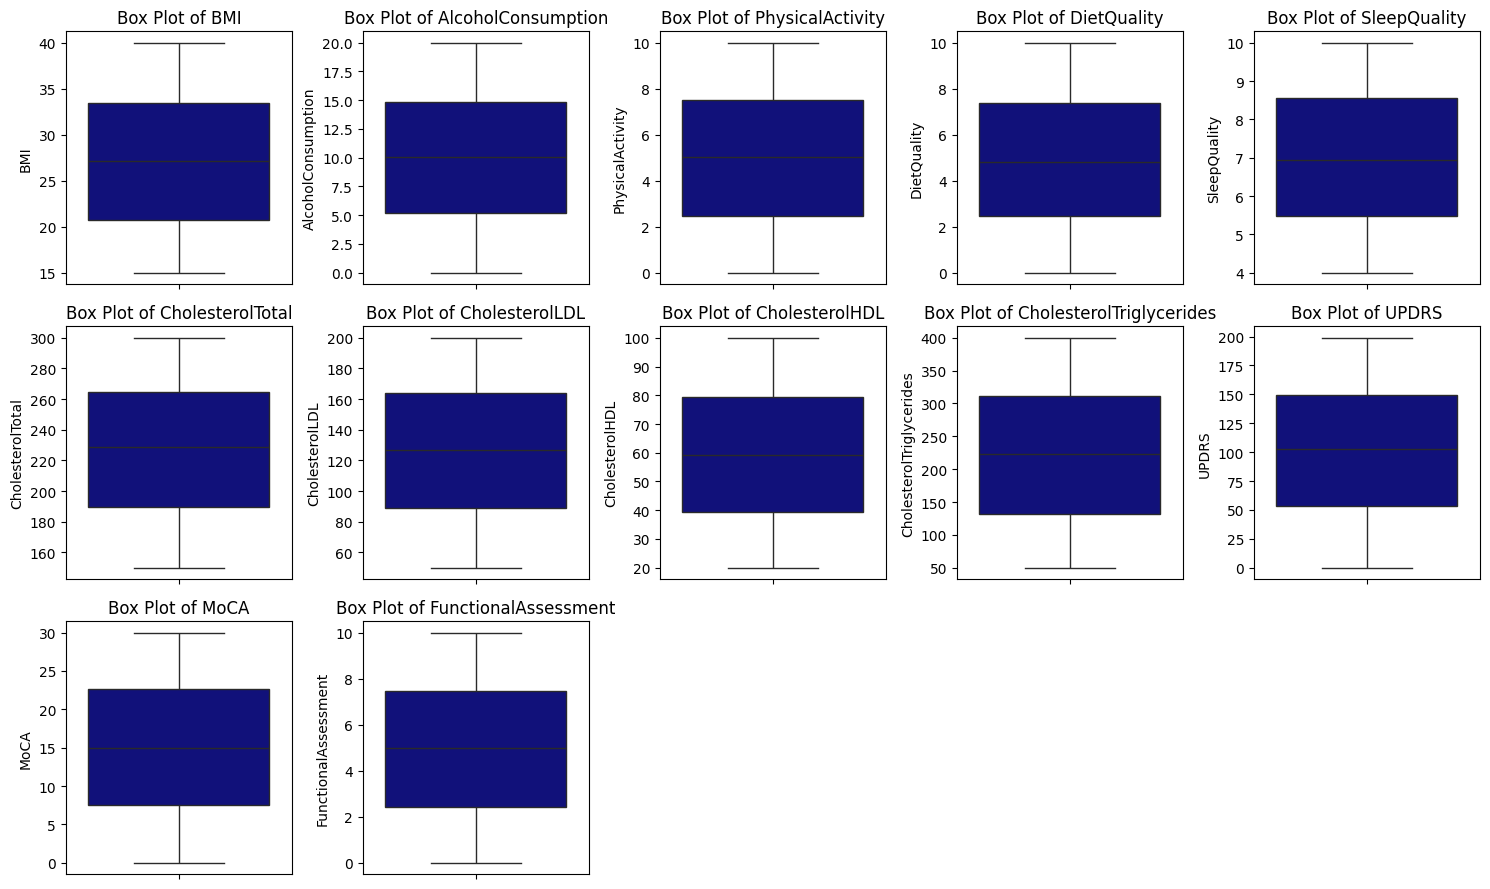

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only float64 columns for plotting, excluding binary ones
float_cols = df.select_dtypes(include=['float64']).columns

# Identify binary columns among float columns
binary_float_cols = [col for col in float_cols if df[col].nunique() == 2 and set(df[col].unique()) == {0.0, 1.0}]

# Exclude binary float columns from the list of float columns to plot
numerical_cols_for_plot = [col for col in float_cols if col not in binary_float_cols]

# Determine the number of rows and columns for the subplot grid
n_cols = 5 # Adjust number of columns for box plots
n_rows = (len(numerical_cols_for_plot) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3)) # Adjusted figure size
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# Plot box plots for each selected numerical column
for i, col in enumerate(numerical_cols_for_plot):
    sns.boxplot(y=df[col], ax=axes[i], color='darkblue')
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There is clearly no outlier. We can continue to explore the categorical data. Let's first explore binary data :     

In [8]:
import pandas as pd

# Select int64 columns, excluding PatientID
int_cols = df.select_dtypes(include=['int64']).columns.drop('PatientID')

# Identify binary int64 columns
binary_int_cols = [col for col in int_cols if df[col].nunique() == 2 and set(df[col].unique()) == {0, 1}]

all_binary_info = []

# Collect value counts and percentages for each binary int64 column
for col in binary_int_cols:
    percentages = df[col].value_counts(normalize=True).mul(100).round(1)

    for value, percentage in percentages.items():
        all_binary_info.append({
            'Column': col,
            'Value': value,
            'Percentage': f'{percentage}%'
        })

# Create a pandas DataFrame from the collected information
binary_percentage_df = pd.DataFrame(all_binary_info)

# Pivot the DataFrame to show percentages of 0 and 1 for each column
binary_percentage_pivot = binary_percentage_df.pivot(index='Column', columns='Value', values='Percentage').reset_index()
binary_percentage_pivot.columns.name = None # Remove columns name

# Rename columns for clarity
binary_percentage_pivot = binary_percentage_pivot.rename(columns={0: 'Percentage_0', 1: 'Percentage_1'})

# Convert percentage columns to numeric for sorting
binary_percentage_pivot['Percentage_0_numeric'] = binary_percentage_pivot['Percentage_0'].str.rstrip('%').astype('float')
binary_percentage_pivot['Percentage_1_numeric'] = binary_percentage_pivot['Percentage_1'].str.rstrip('%').astype('float')


# Sort the DataFrame by 'Percentage_0'
binary_percentage_pivot_sorted = binary_percentage_pivot.sort_values(by='Percentage_0_numeric', ascending=False)

# Drop the numeric helper columns before displaying
binary_percentage_pivot_sorted = binary_percentage_pivot_sorted.drop(columns=['Percentage_0_numeric', 'Percentage_1_numeric'])

# Display the resulting DataFrame
print("Percentage of 0 and 1 for binary integer columns (excluding PatientID), sorted by Percentage_0:")
display(binary_percentage_pivot_sorted)

Percentage of 0 and 1 for binary integer columns (excluding PatientID), sorted by Percentage_0:


,Column,Percentage_0,Percentage_1
13,Stroke,95.1%,4.9%
14,TraumaticBrainInjury,89.4%,10.6%
8,PosturalInstability,86.1%,13.9%
7,Hypertension,85.4%,14.6%
5,FamilyHistoryParkinsons,85.4%,14.6%
3,Diabetes,85.2%,14.8%
2,Depression,79.5%,20.5%
0,Bradykinesia,79.2%,20.8%
10,SleepDisorders,75.5%,24.5%
9,Rigidity,74.7%,25.3%


It is important to notice that some columns have very high percentage of 0. We can keep this data at this stage because it may have a strong link with the detection of the disease. However, we will have to be careful when choosing models by favoring models that are not very sensitive to the imbalanced features.

The *diagnosis* output is well balanced. We have no need to apply SMOTE to this stage

Let's continue with the categorical data and check the distribution of values.

In [9]:
import pandas as pd

# Get percentages for 'Ethnicity'
ethnicity_percentages = df['Ethnicity'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ethnicity_df = ethnicity_percentages.reset_index()
ethnicity_df.columns = ['Value', 'Percentage']
ethnicity_df['Column'] = 'Ethnicity'

# Get percentages for 'EducationLevel'
education_percentages = df['EducationLevel'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
education_df = education_percentages.reset_index()
education_df.columns = ['Value', 'Percentage']
education_df['Column'] = 'EducationLevel'

# Concatenate the two dataframes
categorical_percentages_df = pd.concat([ethnicity_df, education_df], ignore_index=True)

# Pivot the DataFrame to have columns as rows and percentages as columns
categorical_percentages_pivot = categorical_percentages_df.pivot(index='Column', columns='Value', values='Percentage')

# Display the pivoted dataframe
print("Percentages for 'Ethnicity' and 'EducationLevel' (Pivoted):")
display(categorical_percentages_pivot)

Percentages for 'Ethnicity' and 'EducationLevel' (Pivoted):


Value,0,1,2,3
Column,,,,
EducationLevel,18.4%,39.9%,31.2%,10.5%
Ethnicity,60.3%,20.2%,9.4%,10.1%


Although the categorical features are unbalanced, we kan keep thme as it is. The modeles we will choose will handle well this unbalanced data.

Let's finally check the distribution of the Age feature

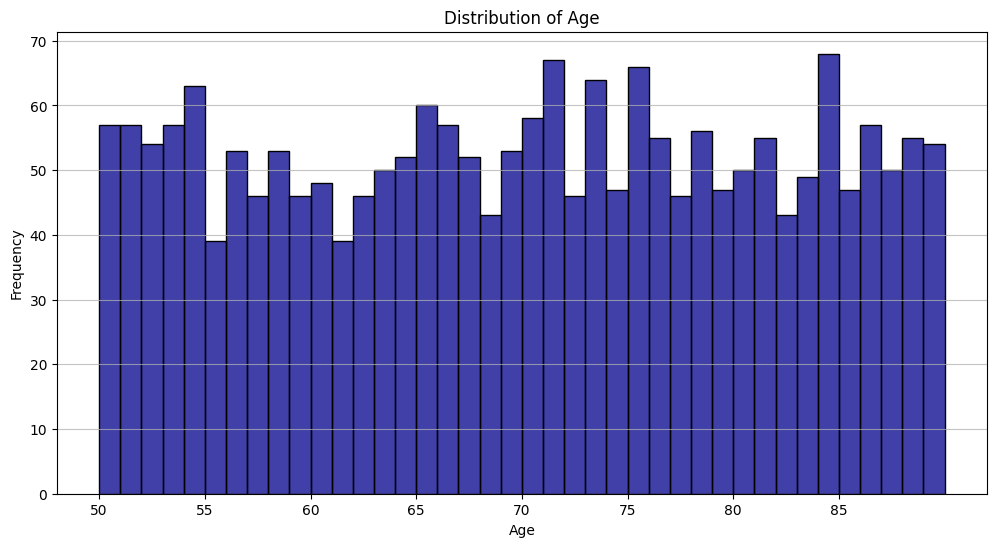

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the range of ages to define bins for each integer value
min_age = df['Age'].min()
max_age = df['Age'].max()
age_bins = range(min_age, max_age + 2) # Add 2 to include the max_age in a bin

# Create a histogram for the 'Age' column with dark blue color and one bin per age
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', bins=age_bins, kde=False, color='darkblue', edgecolor='black') # Use bins for each age, no kde
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(min_age, max_age + 1, 5)) # Set x-ticks at intervals of 5 years for readability
plt.grid(axis='y', alpha=0.75)
plt.show()

Let's create clusters for this numerical feature. We'll create a new categorical column in the DataFrame that assigns each patient to an age group based on their age.


In [11]:
# Define the age bins based on the distribution observed
age_bins = [50, 55, 60, 65, 70, 75, 80, 85, 95]

# Define labels for the age bins
age_labels = ['50-55', '56-60', '61-65', '65-70', '71-75', '76-80', '81-85', '+85']

In [12]:
# Create the 'Age_Group' column by cutting the 'Age' column into defined bins
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the value counts for the newly created 'Age_Group' column
print("\nValue counts for 'Age_Group':")
age_group_counts = df['Age_Group'].value_counts().to_frame(name='Count')
age_group_percentages = df['Age_Group'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
age_group_info = age_group_counts.join(age_group_percentages.rename('Percentage'))

# Sort the DataFrame by the index (Age_Group)
age_group_info_sorted = age_group_info.sort_index()

display(age_group_info_sorted)


Value counts for 'Age_Group':


,Count,Percentage
Age_Group,,
50-55,288,13.7%
56-60,237,11.3%
61-65,235,11.2%
65-70,265,12.6%
71-75,282,13.4%
76-80,270,12.8%
81-85,265,12.6%
+85,263,12.5%


Let's substitute, in the Feature engineering phase, the initial *Age* column by these new grouping.

**▶ f. Let's check the correlation heatmap of the numerical features :**

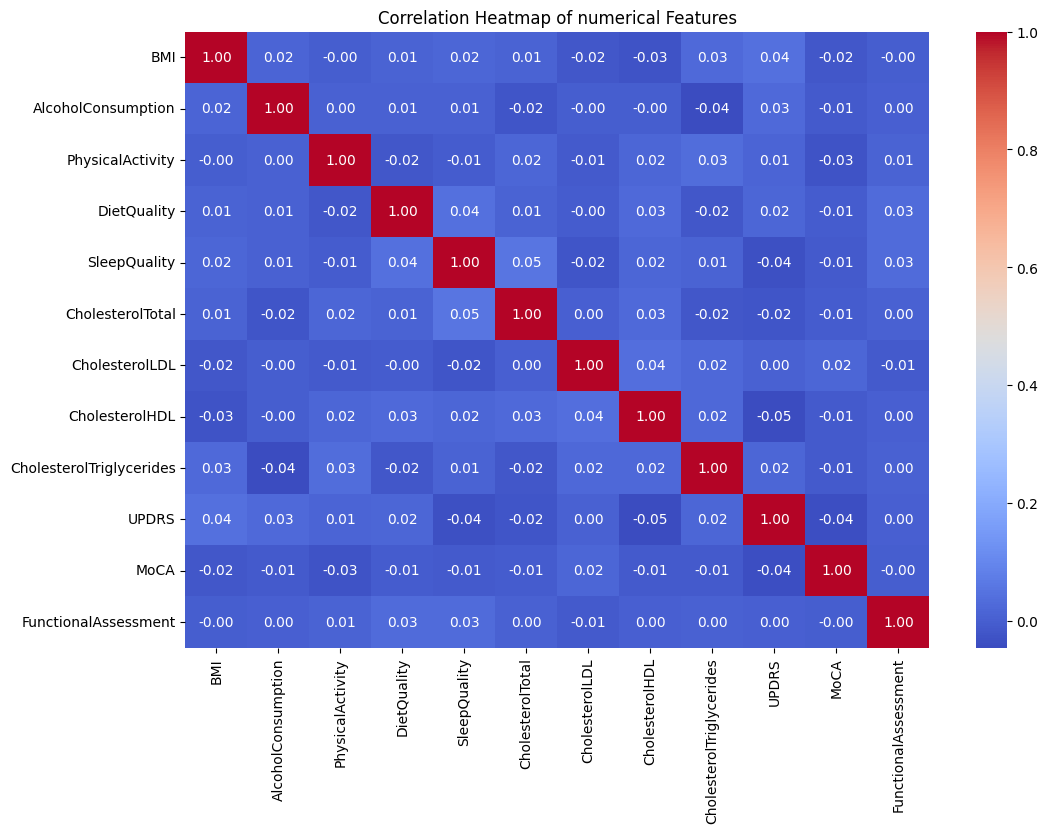

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only float64 columns for correlation heatmap
numerical_cols_for_corr = df.select_dtypes(include=['float64']).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols_for_corr].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of numerical Features')
plt.show()

There are no strong linear relationship between numerical input features.

Lets's now check the relation between each input feature and the output *diagnosis*.

First, we'll chek the relation betwwen numerical features and the output :    

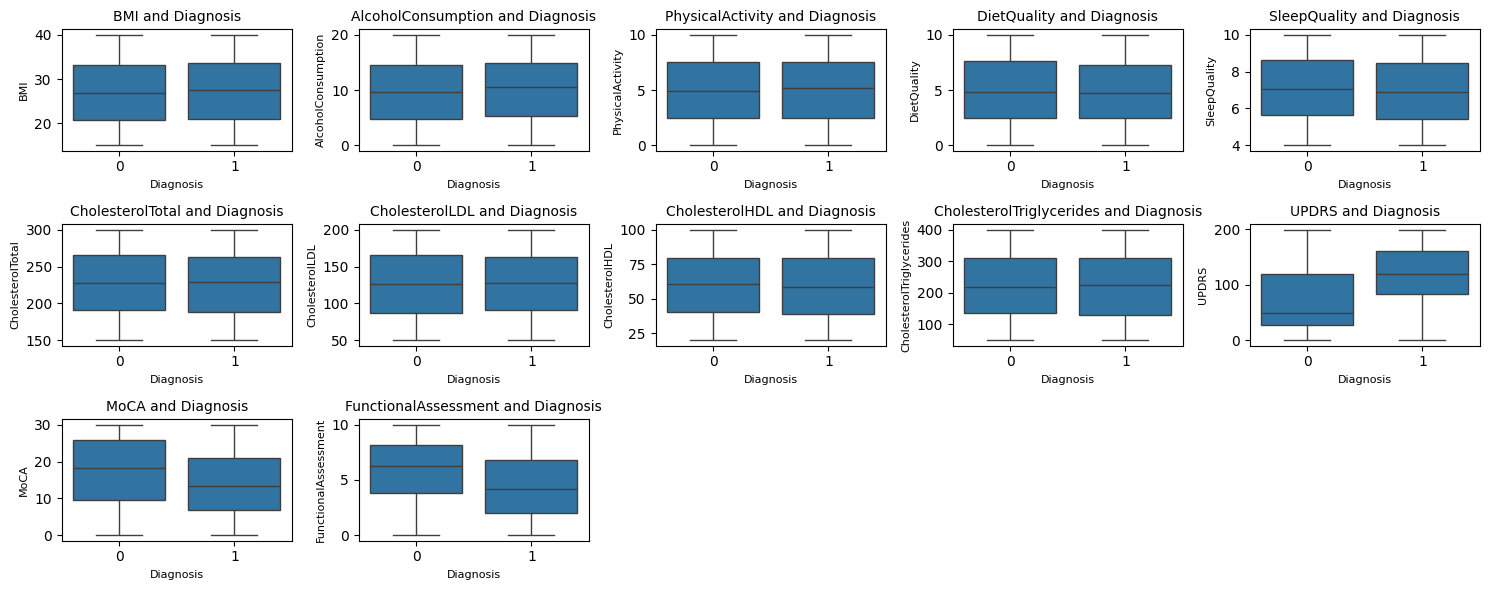

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns with float64 data type
numerical_cols = df.select_dtypes(include=['float64']).columns

# Determine the number of rows and columns for the subplot grid
n_cols = 5
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2))
axes = axes.flatten()

# Iterate through the numerical columns and create box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Diagnosis', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} and Diagnosis', fontsize=10) # Reduced title font size
    axes[i].set_xlabel('Diagnosis', fontsize=8) # Reduced x-axis label font size
    axes[i].set_ylabel(col, fontsize=8) # Reduced y-axis label font size

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

*UPDRS*, *MoCA* and *FunctioalAssessment* seem to have a strong relation with the final *diagnosis*. This conclusion seems logical and consistent. Other features do not have any strong relation with final *diagnosis*.

We can now check the relation between binary features and the output :

In [15]:
import pandas as pd

# Identify binary columns (excluding 'Diagnosis' and 'PatientID')
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != 'Diagnosis' and col != 'PatientID']

binary_proportions = []

# Calculate the proportion of 1s for each binary column by Diagnosis
for col in binary_cols:
    proportions = df.groupby('Diagnosis')[col].value_counts(normalize=True).unstack()
    if 1 in proportions.columns: # Check if value 1 exists for this column
        proportion_diag_0 = proportions.loc[0, 1] if 0 in proportions.index and 1 in proportions.columns else 0
        proportion_diag_1 = proportions.loc[1, 1] if 1 in proportions.index and 1 in proportions.columns else 0
        binary_proportions.append({
            'Binary Feature': col,
            'Proportion of 1 (Diagnosis=0)': proportion_diag_0,
            'Proportion of 1 (Diagnosis=1)': proportion_diag_1,
            'Proportion Difference': proportion_diag_1 - proportion_diag_0 # Calculate the difference
        })
    else:
        # Handle cases where a binary column might only have 0s in the data
         binary_proportions.append({
            'Binary Feature': col,
            'Proportion of 1 (Diagnosis=0)': 0.0,
            'Proportion of 1 (Diagnosis=1)': 0.0,
            'Proportion Difference': 0.0
        })


# Create a pandas DataFrame from the collected information
binary_proportions_df = pd.DataFrame(binary_proportions)

# Sort by the absolute difference in descending order
binary_proportions_df_sorted = binary_proportions_df.sort_values(by='Proportion Difference', ascending=False)


# Format the percentage columns for display
binary_proportions_df_sorted['Proportion of 1 (Diagnosis=0)'] = binary_proportions_df_sorted['Proportion of 1 (Diagnosis=0)'].apply(lambda x: f'{x:.1%}')
binary_proportions_df_sorted['Proportion of 1 (Diagnosis=1)'] = binary_proportions_df_sorted['Proportion of 1 (Diagnosis=1)'].apply(lambda x: f'{x:.1%}')
binary_proportions_df_sorted['Proportion Difference'] = binary_proportions_df_sorted['Proportion Difference'].apply(lambda x: f'{x:.1%}')


# Display the resulting DataFrame
print("Proportion of '1' for each binary feature by Diagnosis, sorted by difference:")
display(binary_proportions_df_sorted)

Proportion of '1' for each binary feature by Diagnosis, sorted by difference:


,Binary Feature,Proportion of 1 (Diagnosis=0),Proportion of 1 (Diagnosis=1),Proportion Difference
8,Tremor,25.8%,53.8%,28.0%
9,Rigidity,15.0%,31.6%,16.6%
10,Bradykinesia,11.2%,26.6%,15.4%
11,PosturalInstability,7.4%,17.9%,10.5%
6,Depression,17.5%,22.4%,4.9%
5,Diabetes,12.2%,16.4%,4.2%
14,Constipation,28.2%,30.6%,2.4%
0,Gender,48.2%,49.9%,1.7%
3,TraumaticBrainInjury,9.7%,11.2%,1.5%
7,Stroke,4.1%,5.4%,1.2%


This summary shows strong relation beween *diagnosis* and these 4 features : *Tremor*, *Rigidity*, *Bradykinesia*, *PosturalInstability*

Finally, we can check the relation between the *diagnosis* output and the categorical features : *ethnicity* and *EducationLevel*

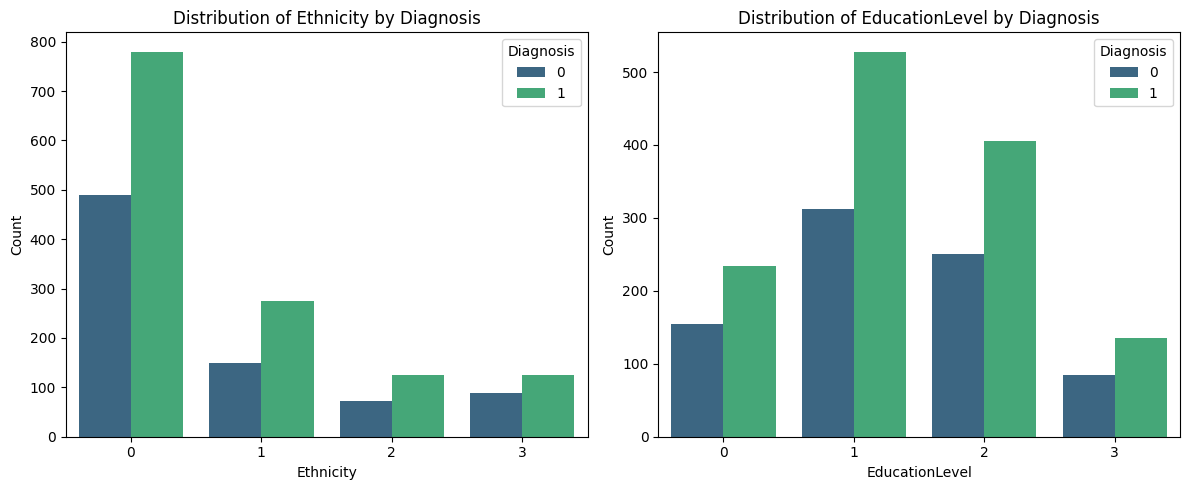

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to analyze
categorical_cols = ['Ethnicity', 'EducationLevel']

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten()

# Plot count plots for each categorical column, colored by Diagnosis
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Diagnosis', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Diagnosis')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Diagnosis')


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Proportions are roughly the same for the categorical variables

# 3. Train / Test split

Let's split the dataset in training and test set with a ration of 80/20

In [17]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the original df
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1684, 35)
Shape of X_test: (421, 35)
Shape of y_train: (1684,)
Shape of y_test: (421,)




---



# 4. Feature engineering

**a. Removing useless columns : *Patient_ID*, *DoctorInCharge***

As seen in the exploring phase, let's replace the *Age* columns (in this step whe just drop the *Age* column); And let's drop the *Patient_ID* and *DoctorInCharge* columns.

In [18]:
# Drop the original useless columns
X_train.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
X_test.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

# Drop the original Age columns, as we have now clusters
X_train.drop('Age', axis=1, inplace=True)
X_test.drop('Age', axis=1, inplace=True)

# Display the columns
print("\nColumns after dropping useless columns in the training set:")
print(X_train.columns)


Columns after dropping useless columns in the training set:
Index(['Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension',
       'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Age_Group'],
      dtype='object')


We are now able to convert all categorical columns into numerical format using one-hot encoding.

In [19]:
# Select the columns to be one-hot encoded
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension',
       'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Age_Group']

# Perform one-hot encoding on the selected columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

# Align columns - crucial for consistent feature sets between train and test
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Display the first few rows of the new DataFrame with encoded columns
display(X_train_encoded.head())

# Display the data types of the encoded training data, sorted by data type
print("\nData types of the encoded training data:")
print(X_train_encoded.columns)

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,...,Constipation_0,Constipation_1,Age_Group_50-55,Age_Group_56-60,Age_Group_61-65,Age_Group_65-70,Age_Group_71-75,Age_Group_76-80,Age_Group_81-85,Age_Group_+85
1700,38.165782,14.401750,5.017636,7.128222,8.839484,214.446455,185.601755,98.305359,177.613258,114.941744,...,False,True,False,True,False,False,False,False,False,False
1102,33.877785,15.545237,9.346554,1.901783,6.183109,168.545178,130.446298,29.089431,237.987107,191.992824,...,True,False,False,False,False,False,False,False,True,False
508,30.111818,5.942235,5.920051,1.504967,8.590509,291.316103,186.558645,40.764986,342.071323,121.425375,...,True,False,True,False,False,False,False,False,False,False
679,19.931085,7.315375,9.740024,8.868319,6.359914,174.858648,191.811289,38.752199,375.127417,30.952378,...,True,False,False,False,False,False,False,False,False,True
1000,32.591481,6.037814,3.321126,8.735950,4.679000,231.507811,118.043431,32.477083,385.517466,63.069273,...,True,False,False,False,False,False,False,True,False,False



Data types of the encoded training data:
Index(['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS',
       ...
       'Constipation_0', 'Constipation_1', 'Age_Group_50-55',
       'Age_Group_56-60', 'Age_Group_61-65', 'Age_Group_65-70',
       'Age_Group_71-75', 'Age_Group_76-80', 'Age_Group_81-85',
       'Age_Group_+85'],
      dtype='object', length=208)


In [20]:
# Get the data types of columns in X_train_encoded and count occurrences of each type
dtype_counts = X_train_encoded.dtypes.value_counts()

print("Count of each data type in X_train_encoded:")
display(dtype_counts)

Count of each data type in X_train_encoded:


,count
bool,196
float64,12


**b. Scaling the numerical values**

As scales are different from one feature to another, it is necessary to standardize all these numerical values.

In [21]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
# Assuming numerical columns are those that are not boolean after one-hot encoding
numerical_cols = X_train_encoded.select_dtypes(include=['float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

print("Scaled training data:")
display(X_train_scaled.head())

print("\nScaled testing data:")
display(X_test_scaled.head())

Scaled training data:


,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,...,Constipation_0,Constipation_1,Age_Group_50-55,Age_Group_56-60,Age_Group_61-65,Age_Group_65-70,Age_Group_71-75,Age_Group_76-80,Age_Group_81-85,Age_Group_+85
1700,1.518932,0.768291,0.009098,0.784252,1.036426,-0.283215,1.374462,1.637062,-0.449776,0.240395,...,False,True,False,True,False,False,False,False,False,False
1102,0.926410,0.969844,1.496181,-1.039368,-0.471761,-1.332531,0.106169,-1.315257,0.143216,1.599598,...,True,False,False,False,False,False,False,False,True,False
508,0.406023,-0.722797,0.319099,-1.177827,0.895068,1.474048,1.396466,-0.817251,1.165532,0.354768,...,True,False,True,False,False,False,False,False,False,False
679,-1.000766,-0.480765,1.631347,1.391411,-0.371378,-1.188203,1.517250,-0.903104,1.490209,-1.241202,...,True,False,False,False,False,False,False,False,False,True
1000,0.748667,-0.705950,-0.573692,1.345225,-1.325735,0.106813,-0.179033,-1.170761,1.592260,-0.674651,...,True,False,False,False,False,False,False,True,False,False



Scaled testing data:


,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,...,Constipation_0,Constipation_1,Age_Group_50-55,Age_Group_56-60,Age_Group_61-65,Age_Group_65-70,Age_Group_71-75,Age_Group_76-80,Age_Group_81-85,Age_Group_+85
194,-1.610216,-0.937456,1.698334,-0.928595,1.230378,0.984016,1.118380,1.683402,1.063465,-0.031342,...,True,False,False,False,True,False,False,False,False,False
1879,1.731795,-1.182977,-0.964779,0.594393,-0.143414,-0.844673,1.381698,-1.670738,-0.908917,0.377694,...,False,True,False,False,False,True,False,False,False,False
136,-0.379680,0.700988,-0.595346,0.342635,0.035883,-1.725391,-1.596390,-0.879574,-0.406435,-0.083313,...,False,True,True,False,False,False,False,False,False,False
1522,1.754671,1.468099,0.290653,-0.684652,-0.286583,-1.409935,1.639407,-1.455043,1.310730,0.518882,...,False,True,True,False,False,False,False,False,False,False
326,-1.582046,-0.374812,-0.102589,0.669840,-0.420464,1.410975,-0.752723,-1.228963,-0.208852,-0.292665,...,True,False,False,False,False,False,False,False,True,False


# 5. Modeling and selecting the best model

**a. Choosing some classification models**

We'll test 5 models without focusing on the hyperparameter. We'll just select the fault values for all inputs of the different models.

**b. Train and evaluate initial models**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

results = []

# Loop through the models, train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by Accuracy
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Display the results table
print("Model Evaluation Results (Sorted by Accuracy):")
display(results_df_sorted)

Model Evaluation Results (Sorted by Accuracy):


,Model,Accuracy,Precision,Recall,F1-score
5,XGBoost,0.938242,0.938433,0.938242,0.938315
2,Random Forest,0.935867,0.936650,0.935867,0.935288
1,Decision Tree,0.895487,0.896138,0.895487,0.895729
0,Logistic Regression,0.812352,0.810570,0.812352,0.810047
3,Support Vector Machine,0.795724,0.793715,0.795724,0.794040
4,K-Nearest Neighbors,0.705463,0.707746,0.705463,0.706461


***XGBoost*** and ***RandomForest*** achieve very convincing results. They both achieve accuracies above 90%, which is obviously quite satisfactory at this stage.

Furthermore, in this case of disease detection, it is very important to minimize false negatives (FN). In the case of PD detection, we favor minimizing false negatives (FN) over minimizing false positives (FP). Detection as early as possible allows for the most appropriate treatment. Missing positive cases can be detrimental. That means we also have to consider the *recall* measure. For both ***XGBoost*** and ***RandomForest***, the measure is above 0.938 which means they are both very efficient for our study.

Let's do the hyperparameter tuning for the model that got the best accuracy, i.e. XGBoost

## 6. Hyperparameter Tuning (XGBoost with GridSearchCV)

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, make_scorer

# Define the XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Define the scoring metric (using accuracy for demonstration, but recall might be more relevant for this problem)
# You can change 'accuracy' to 'recall' if you prioritize minimizing false negatives
scorer = make_scorer(accuracy_score)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=scorer, cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Evaluate the best model on the test data
best_xgb_model = grid_search.best_estimator_
y_pred_tuned_xgb = best_xgb_model.predict(X_test_scaled)
accuracy_tuned_xgb = accuracy_score(y_test, y_pred_tuned_xgb)
recall_tuned_xgb = recall_score(y_test, y_pred_tuned_xgb) # Calculate recall for the tuned model

print("\nTuned XGBoost Model Evaluation on Test Data:")
print("Accuracy:", accuracy_tuned_xgb)
print("Recall:", recall_tuned_xgb) # Display recall for the tuned model

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best accuracy found:  0.9287420996652732

Tuned XGBoost Model Evaluation on Test Data:
Accuracy: 0.9311163895486936
Recall: 0.946360153256705


Accuracy is just bit lower than without tuning. But *recall* is higher by almost 0.8%. That means we have fewer FN in this configuration. Let's see if we get better results with RandomSearch

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from scipy.stats import uniform, randint

# Define the XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': randint(100, 500), # Random integer between 100 and 500
    'learning_rate': uniform(0.01, 0.2), # Uniform distribution between 0.01 and 0.21
    'max_depth': randint(3, 10), # Random integer between 3 and 10
    'subsample': uniform(0.6, 0.4), # Uniform distribution between 0.6 and 1.0
    'colsample_bytree': uniform(0.6, 0.4) # Uniform distribution between 0.6 and 1.0
}

# Define the scoring metric (using accuracy, but recall might be more relevant)
scorer = make_scorer(accuracy_score)

# Set up RandomizedSearchCV
# n_iter controls the number of parameter combinations sampled
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist,
                                   n_iter=100, scoring=scorer, cv=3, verbose=1,
                                   random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

# Evaluate the best model on the test data
best_xgb_model_rs = random_search.best_estimator_
y_pred_tuned_xgb_rs = best_xgb_model_rs.predict(X_test_scaled)
accuracy_tuned_xgb_rs = accuracy_score(y_test, y_pred_tuned_xgb_rs)
recall_tuned_xgb_rs = recall_score(y_test, y_pred_tuned_xgb_rs) # Calculate recall

print("\nTuned XGBoost Model Evaluation on Test Data (RandomizedSearchCV):")
print("Accuracy:", accuracy_tuned_xgb_rs)
print("Recall:", recall_tuned_xgb_rs) # Display recall

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'colsample_bytree': np.float64(0.9530545372757359), 'learning_rate': np.float64(0.04774142166827588), 'max_depth': 3, 'n_estimators': 198, 'subsample': np.float64(0.8801431319891084)}
Best accuracy found:  0.9305225163504418

Tuned XGBoost Model Evaluation on Test Data (RandomizedSearchCV):
Accuracy: 0.9358669833729216
Recall: 0.9501915708812261


*Recall* is even higher with RandomSearch. Recall is now above 95% which is considerable increase. Let's a final test with Bayesian optimization which is supposed to be the best tuning method for XGBoost.

In [25]:
%pip install hyperopt

We will first focus on optimizing the *accuracy* output. Let's define the function we want to optimize.

In [26]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

def objective(params):
    """Objective function for Bayesian optimization."""
    # Convert float params to int
    for par in ['max_depth', 'n_estimators']:
        params[par] = int(params[par])

    model = XGBClassifier(
        **params,
        random_state=42,
        eval_metric='logloss'
    )

    # Calculate cross-validated accuracy
    accuracy = cross_val_score(
        model,
        X_train_scaled,
        y_train,
        cv=3,
        scoring='accuracy'
    ).mean()

    # Return the negative of the accuracy as the loss
    return {'loss': -accuracy, 'status': STATUS_OK}

**Reasoning**:
Let's define the search space for the same parameters that we tried in the gridseacrh and the randomsearch.



In [27]:
from hyperopt import hp

# Define the hyperparameter search space
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)
}

print("Hyperparameter search space defined.")
print(space)

Hyperparameter search space defined.
{'n_estimators': <hyperopt.pyll.base.Apply object at 0x785869b01e50>, 'learning_rate': <hyperopt.pyll.base.Apply object at 0x785869b00590>, 'max_depth': <hyperopt.pyll.base.Apply object at 0x785869b00d10>, 'subsample': <hyperopt.pyll.base.Apply object at 0x785869b00c50>, 'colsample_bytree': <hyperopt.pyll.base.Apply object at 0x785869b02cd0>}


We are now ready to run the optimization and find the best parameters for our XGBoost function :    



In [28]:
# Run the Bayesian optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

print("\nBest hyperparameters found by Bayesian optimization:")
print(best)

100%|██████████| 100/100 [03:49<00:00,  2.29s/trial, best loss: -0.931706641461718]

Best hyperparameters found by Bayesian optimization:
{'colsample_bytree': np.float64(0.8049163259610368), 'learning_rate': np.float64(0.07785276455152432), 'max_depth': np.float64(3.0), 'n_estimators': np.float64(267.0), 'subsample': np.float64(0.7494200891698708)}


Let's now compare the results of the 3 methods (for both *accuracy* and *recall*)



In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score

# Get the best hyperparameters from Bayesian optimization
best_bayes_params = {
    'colsample_bytree': best['colsample_bytree'],
    'learning_rate': best['learning_rate'],
    'max_depth': int(best['max_depth']), # Ensure max_depth is an integer
    'n_estimators': int(best['n_estimators']), # Ensure n_estimators is an integer
    'subsample': best['subsample']
}


# Train a new XGBoost model with the best parameters from Bayesian Optimization
best_xgb_model_bayes = XGBClassifier(
    **best_bayes_params,
    random_state=42,
    eval_metric='logloss'
)
best_xgb_model_bayes.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_tuned_xgb_bayes = best_xgb_model_bayes.predict(X_test_scaled)

# Evaluate the tuned model on the test data
accuracy_tuned_xgb_bayes = accuracy_score(y_test, y_pred_tuned_xgb_bayes)
recall_tuned_xgb_bayes = recall_score(y_test, y_pred_tuned_xgb_bayes)

print("\nTuned XGBoost Model Evaluation on Test Data (Bayesian Optimization):")
print("Accuracy:", accuracy_tuned_xgb_bayes)
print("Recall:", recall_tuned_xgb_bayes)

# Display the results from GridSearchCV and RandomizedSearchCV for comparison
print("\nComparison of XGBoost Tuning Methods:")

# Get results for the initial XGBoost model (without tuning)
initial_xgb_result = results_df_sorted[results_df_sorted['Model'] == 'XGBoost'].iloc[0]
accuracy_initial_xgb = initial_xgb_result['Accuracy']
recall_initial_xgb = initial_xgb_result['Recall']


print("Initial XGBoost Model Evaluation on Test Data (No Tuning):")
print("Accuracy:", accuracy_initial_xgb)
print("Recall:", recall_initial_xgb)

print("\nGridSearchCV Tuned XGBoost Model Evaluation on Test Data:")
print("Accuracy:", accuracy_tuned_xgb)
print("Recall:", recall_tuned_xgb)

print("\nRandomizedSearchCV Tuned XGBoost Model Evaluation on Test Data:")
print("Accuracy:", accuracy_tuned_xgb_rs)
print("Recall:", recall_tuned_xgb_rs)


Tuned XGBoost Model Evaluation on Test Data (Bayesian Optimization):
Accuracy: 0.9429928741092637
Recall: 0.9655172413793104

Comparison of XGBoost Tuning Methods:
Initial XGBoost Model Evaluation on Test Data (No Tuning):
Accuracy: 0.9382422802850356
Recall: 0.9382422802850356

GridSearchCV Tuned XGBoost Model Evaluation on Test Data:
Accuracy: 0.9311163895486936
Recall: 0.946360153256705

RandomizedSearchCV Tuned XGBoost Model Evaluation on Test Data:
Accuracy: 0.9358669833729216
Recall: 0.9501915708812261


Bayesian optimization appears to the most efficient way of optimizing the hyperparameters of our chosen model, XGBoost. We have now a model that has reached an *accuracy* of 94.8% which is a very convincing result. Recall is 96,9% which can consider an excellent result.

Our main goal was to get better recall, which we achieved by implementing bayesian optimization. In our case, as in many others, Bayeasian optimization appears to be themost efficient method to optimize an XGBoost model.



Finally, let's analyze the feature importances from our best model :     

Top 20 Feature Importances:


,0
Tremor_1,0.095231
UPDRS,0.065094
Tremor_0,0.042358
Bradykinesia_0,0.038353
PosturalInstability_1,0.035705
PosturalInstability_0,0.035594
Bradykinesia_1,0.034085
Rigidity_0,0.033766
FunctionalAssessment,0.031735
MoCA,0.031096


/tmp/ipython-input-30-3182345990.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_series_sorted.head(20).values, y=feature_importance_series_sorted.head(20).index, palette='viridis')


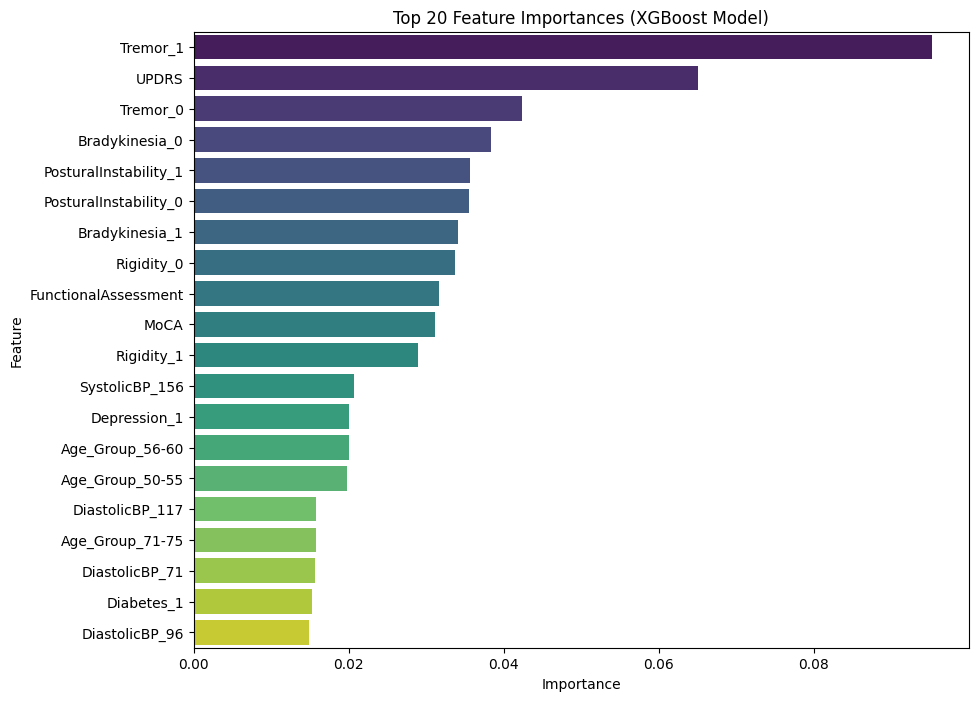

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the best tuned XGBoost model
feature_importances = best_xgb_model_bayes.feature_importances_

# Create a pandas Series for easier handling and plotting
feature_importance_series = pd.Series(feature_importances, index=X_train_scaled.columns)

# Sort the feature importances in descending order
feature_importance_series_sorted = feature_importance_series.sort_values(ascending=False)

# Display the top features
print("Top 20 Feature Importances:")
display(feature_importance_series_sorted.head(20))

# Plot the top N feature importances (e.g., top 20)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_series_sorted.head(20).values, y=feature_importance_series_sorted.head(20).index, palette='viridis')
plt.title('Top 20 Feature Importances (XGBoost Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Unsurprisingly, *tremor*, *updrs score*, *bradykinesia* and *postural instability* are the most important features for our model.

## 7. Saving the Best Model

In [31]:
import joblib
import os

# Define the filename for the saved model
model_filename = 'best_xgboost_model.pkl'

# Save the model to the specified file
joblib.dump(best_xgb_model_bayes, model_filename)

print(f"Best XGBoost model saved to {model_filename}")

# Verify the file is saved (optional)
if os.path.exists(model_filename):
    print("Model file successfully created.")
else:
    print("Error: Model file was not created.")

Best XGBoost model saved to best_xgboost_model.pkl
Model file successfully created.


## 7. Results and Conclusion



*   We now have a fully operational model at our disposal. We have built a machine learning model to predict Parkinson's disease. The results regarding the various metrics are very satisfactory. The accuracy is almost 95.0%, but we have also managed to minimize the number of FNs (recall is 96.9%), which is always a major objective in the case of detecting disabling diseases.

*   Clinical assessment scores (UPDRS, MoCA, FunctionalAssessment) and key symptoms (Tremor, Rigidity, Bradykinesia, PosturalInstability) are the most influential features in predicting Parkinson's disease.

*   Such a model can help doctors factualize a diagnosis. It obviously does not replace a consultation and examinations with qualified doctors or specialists; but it can be a valuable aid.




**Further investigations:**

*   Many features in our dataset were binary, so they may lack nuance depending on the affected patient. Greater symptom refinement may help improve the model and its future use.
*   Regarding speech problems, numerous datasets are available to detect the presence or at least a suspicion of Parkinson's disease in voice variations. Combining our dataset with a dataset of this type would allow us to seriously refine the model.
*   While detection is of course key, monitoring the progression of the disease is just as important. Our model could potentially serve as a basis for this other type of modeling.
